In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
# Don't convert text to path
plt.rcParams['svg.fonttype'] = 'none'
import numpy as np
import pandas as pd

In [2]:
men = pd.read_csv('m.csv', skiprows=2, encoding='latin-1', na_values='..', index_col=0).fillna(1)
women = pd.read_csv('k.csv', skiprows=2, encoding='latin-1', na_values='..', index_col=0).fillna(1)

In [3]:
def mean_year(s):
    return np.sum(np.int64(s.index)*s)/np.sum(s)

In [4]:
# No data for "Bernt" for unknown reason. Just ignore it.
men_by_year = men[men.index != 'Bernt'].apply(mean_year, axis=1).sort_values().index
women_by_year = women.apply(mean_year, axis=1).sort_values().index

In [5]:
men_by_year

Index(['Stig', 'Kurt', 'Arne', 'Bertil', 'Rolf', 'Sven', 'Åke', 'Bengt',
       'Lennart', 'Kjell', 'Gunnar', 'Bo', 'Leif', 'Hans', 'Göran', 'Lars',
       'Jan', 'Kent', 'Ulf', 'Kenneth', 'Christer', 'Nils ', 'Håkan', 'Mats',
       'Claes', 'Per', 'Torbjörn', 'Roger', 'Tommy', 'Björn', 'Karl', 'Anders',
       'Olof', 'Dan', 'Jörgen', 'Thomas', 'Johnny', 'Peter', 'Stefan', 'John',
       'Tony', 'Magnus', 'Mikael', 'Robert', 'Patrik', 'Erik', 'Jonas',
       'Johan', 'Rickard', 'Henrik', 'Fredrik', 'Niklas', 'Joakim', 'Martin',
       'Christian', 'Jimmy', 'Mattias', 'Andreas', 'Daniel', 'Dennis', 'Ali',
       'Tobias', 'Mohamed', 'Christoffer', 'Marcus', 'David ', 'Gustav',
       'Josef', 'Olle', 'Jesper', 'Pontus', 'Robin', 'Jakob', 'Sebastian',
       'Simon', 'Axel', 'Joel', 'Alexander', 'Viktor', 'Linus', 'Samuel',
       'Emil', 'Oskar', 'Jonathan', 'Adam', 'Max', 'Rasmus', 'Filip', 'Anton',
       'Kevin', 'Felix', 'Albin', 'Ludvig', 'Leo', 'William', 'Isak', 'Elias',
      

In [6]:
women_by_year

Index(['Inga', 'Birgit', 'Ulla', 'Siv', 'Gunnel', 'Gun', 'Barbro', 'Berit',
       'Britt', 'Rut',
       ...
       'Julia', 'Lovisa', 'Agnes', 'Klara', 'Moa', 'Felicia', 'Emilia', 'Alva',
       'Olivia', 'Wilma'],
      dtype='object', name='tilltalsnamn', length=101)

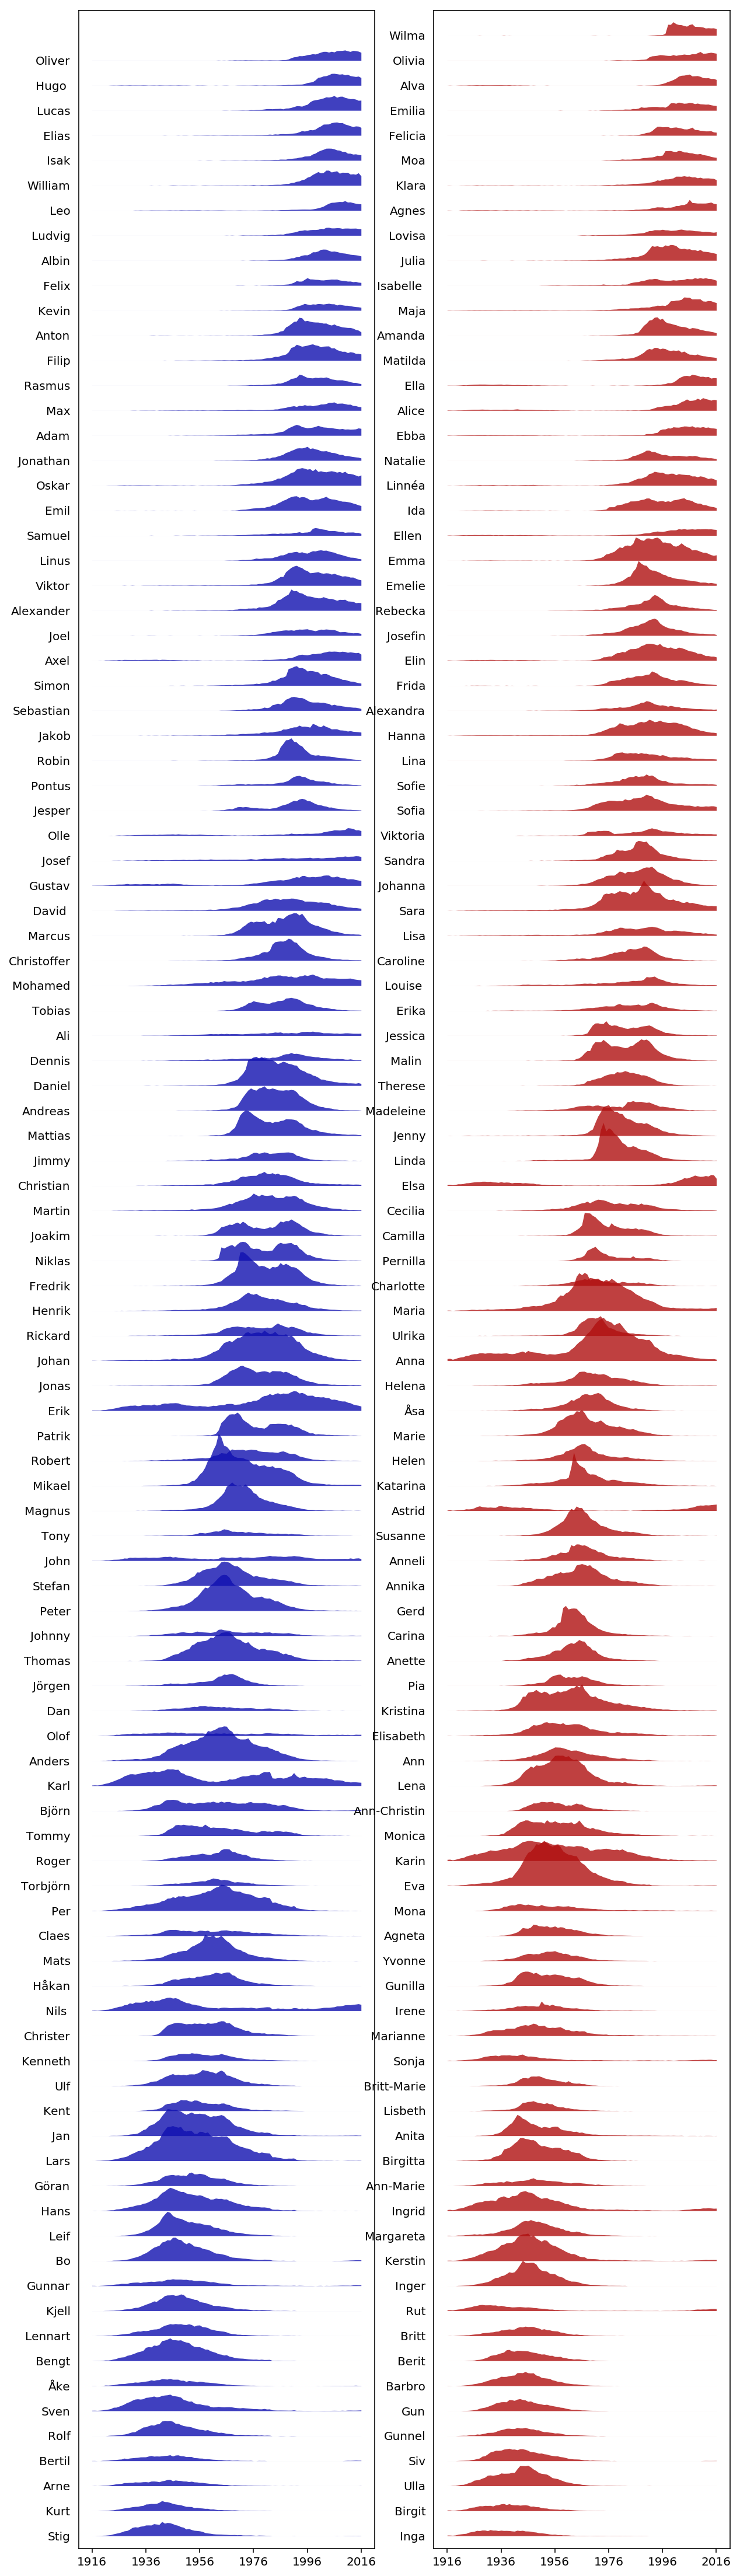

In [7]:
sep = 2000
fig, (axm, axw) = plt.subplots(1, 2, figsize=(10, 40))

for i, name in enumerate(men_by_year):
    axm.fill_between(
        np.int64(men.columns),
        men.loc[name]+sep*i,
        sep*i,
        color='#1010b0',
        lw=0,
        alpha=0.8,
    )

for i, name in enumerate(women_by_year):
    axw.fill_between(
        np.int64(women.columns),
        women.loc[name]+sep*i,
        sep*i,
        color='#b01010',
        lw=0,
        alpha=0.8,
    )

axm.set_yticks(sep*np.arange(100))
axw.set_yticks(sep*np.arange(101))

axm.set_yticklabels(men_by_year)
axw.set_yticklabels(women_by_year)

axm.set_xticks([*range(1916, 2017, 20)])
axw.set_xticks([*range(1916, 2017, 20)])

axm.set_ylim(-0.5*sep, 101*sep)
axw.set_ylim(-0.5*sep, 101*sep)

axm.yaxis.set_ticks_position('none')
axw.yaxis.set_ticks_position('none') 

plt.savefig('plot.svg')